## Análisis Exploratorio de los Datos

Las librerías necesarias para realizar nuestro primer análisis serán:
- pandas
- numpy
- seaborn

In [58]:
# Importamos las librerias necesarias:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
from matplotlib import pyplot as plt


In [54]:
# Leemos los datasets originales:
hh = pd.read_excel(r'datasets_originales/homicidios.xlsx', sheet_name='HECHOS')
hv = pd.read_excel(r'datasets_originales/homicidios.xlsx', sheet_name='VICTIMAS')
lh = pd.read_excel(r'datasets_originales/lesiones.xlsx', sheet_name='HECHOS')
lv = pd.read_excel(r'datasets_originales/lesiones.xlsx', sheet_name='VICTIMAS')
# Leemos los datasets complementarios:
pob = pd.read_excel(r'datasets complementarios/c2022_caba_est_c1_1.xlsx', sheet_name='Cuadro 1.1', skiprows=2, nrows=18)
barrios = pd.read_csv(r'datasets complementarios/barrios.csv', delimiter=';')

#### Homicidios - Hechos

In [13]:
print(hh.columns)
hh.shape

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')


(696, 21)

In [50]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

- `FECHA` se eliminará, ya contamos con columnas que nos indican año, mes, dia y hora de cada hecho.
- `HORA` se eliminará, ya contamos con una columna que nos indica la hora del día en que ocurrió cada hecho.
- `LUGAR_DEL_HECHO` se eliminará, ya contamos con una columnas que nos dan el detalle geográfico de cada hecho en forma estandarizada.
- 

##### Columna `ID`

In [24]:
hh['ID'].isna().value_counts() # Ningun valor nulo

False    696
Name: ID, dtype: int64

In [48]:
hh['ID'].duplicated().value_counts() # Ningun valor duplicado

False    696
Name: ID, dtype: int64

##### Columna `N_VICTIMAS`

In [51]:
hh['N_VICTIMAS'].value_counts()

1    676
2     19
3      1
Name: N_VICTIMAS, dtype: int64

#### Homicidios - Víctimas

#### Lesiones - Hechos

#### Lesiones - Víctimas

<Figure size 1000x800 with 0 Axes>

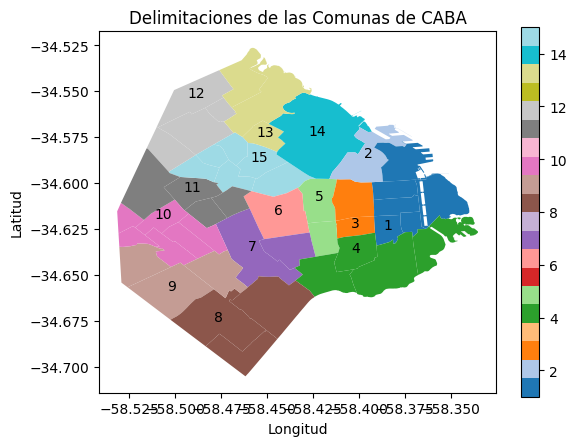

In [71]:
import geopandas as gpd
from shapely import wkt
from matplotlib import pyplot as plt

# Primero, convierte la columna 'WKT' de WKT a objetos shapely
barrios['geometry'] = barrios['WKT'].apply(wkt.loads)

# Convierte la columna 'COMUNA' a tipo entero
barrios['COMUNA'] = barrios['COMUNA'].astype(int)

# Crea un GeoDataFrame a partir de tu DataFrame 'barrios'
gdf = gpd.GeoDataFrame(barrios, geometry='geometry')

# Define el tamaño de la figura
plt.figure(figsize=(10, 8))

# Grafica los polígonos de las comunas con un color distinto para cada una
gdf.plot(column='COMUNA', legend=True, cmap='tab20')

# Utiliza un diccionario para realizar un seguimiento de las comunas ya etiquetadas
etiquetadas = {}

# Agrega etiquetas con el número de comuna en el centro de cada polígono
for idx, row in gdf.iterrows():
    comuna = int(row['COMUNA'])
    if comuna not in etiquetadas:
        etiquetadas[comuna] = True
        plt.annotate(text=comuna, xy=row['geometry'].centroid.coords[0], ha='center')

plt.title('Delimitaciones de las Comunas de CABA')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()
